In [1]:
from sympy import *
from matplotlib import pyplot
from numpy import linspace
init_printing(fontsize=20)

In [13]:
phi_symb = Symbol('\\phi', real=True)
A   = Symbol('A',     real=True)
x   = Symbol('x',     real=True)
k   = Symbol('k',     real=True)

In [14]:
phi = A*sin(k*x)
Eq(Function('phi')(x), phi)

In [6]:
def plot_sg(A_num, k_num):
    phi_num = phi.subs(A, A_num).phi.subs(k, k_num)

    dV_phi = Abs(phi_symb).diff(phi_symb).subs(phi_symb, phi_num)
    d2dt2_phi = diff(x, diff(x, phi))
    display(d2dt2_phi)
    d2dt2_phi_func = d2dt2_phi.subs()
    sqr_wave_ish = dV_phi

    ranges = (x, -0.1, 8.2*pi/k_num)

    display(Eq(A*k**2, A_num*k_num**2))

    m = 1

    rhs_free = d2dt2_phi_func
    rhs_sg   = d2dt2_phi_func - sqr_wave_ish
    rhs_kg   = d2dt2_phi_func - m**2*phi_num

    p = plot(rhs_sg, rhs_free, rhs_kg, ranges, depth=40)

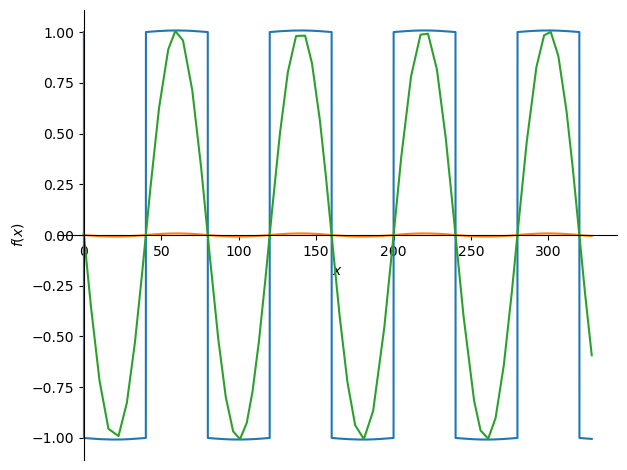

In [7]:
A_num = 4/pi
k_num = 0.1*pi/4

plot_sg(A_num, k_num)

In [8]:
def plot_sg_4paper(A_num, k_num):
    Ak2 = A_num*k_num**2

    phi_num = A_num * sin(k_num*x)

    dV_phi = Abs(phi).diff(phi).subs(phi, phi_num)
    phi_func = Ak2*sin(k_num*x)
    sqr_wave_ish = dV_phi.subs(k, k_num)

    ranges = (x, )

    display(Eq(A, A_num))
    display(Eq(k, k_num))
    display(Eq(A*k**2, Ak2))

    f1 = lambdify(x, -sqr_wave_ish+phi_func, 'numpy')
    f2 = lambdify(x, -sqr_wave_ish, 'numpy')
    f3 = lambdify(x, phi_func, 'numpy')

    x_vals = linspace(float(-1.5*pi/k_num), float(1.5*pi/k_num), 1000)

    line_width = 1

    pyplot.plot(x_vals, f1(x_vals), color='k', linewidth=line_width, linestyle=':', label='$Ak^2\\sin(kx)-\\text{sign}(\\sin(kx))$')
    pyplot.plot(x_vals, f3(x_vals), color='k', linewidth=line_width, linestyle='-.', label='$Ak^2\\sin(kx)$')
    pyplot.legend(loc='upper right')

    loc = '/home/joao/Dropbox/Fisica/Produção/LinearSignum/'
    pyplot.savefig(loc + f"sg_pert_lhs_Ak2_{Ak2:.0e}.png", format='png', dpi=300, bbox_inches='tight')


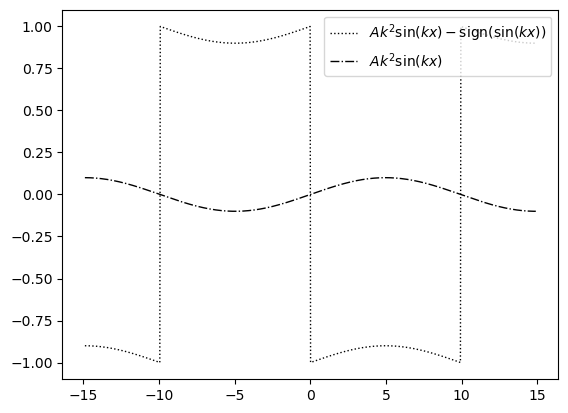

In [40]:
Ak2 = 0.1
A_num = 1
k_num = (Ak2/A_num)**0.5

plot_sg_4paper(A_num, k_num)

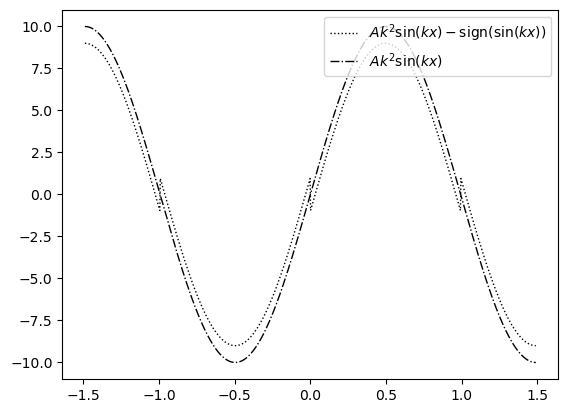

In [41]:
Ak2 = 10
A_num = 1
k_num = (Ak2/A_num)**0.5

plot_sg_4paper(A_num, k_num)

In [17]:
value = 0.1
scientific_notation = f"{value:.0e}"
print(scientific_notation)  # Output: 1.0e-01

1e-01
